In [1]:
import pandas as pd
from sklearn import linear_model
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

<h2> data clean-up

In [21]:
df = pd.read_csv('../data/model_3_data.csv',sep=';')
print(len(df))
df.head()


850


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,339.998 kr.,2020,93000,2019-03-04,El,75.1,498,A,2630
1,385.900 kr.,2021,13000,2022-01-27,El,77.8,325,A,9440
2,419.500 kr.,2021,48000,2021-01-11,El,66.9,513,A,7700
3,448.800 kr.,2021,15500,2021-09-23,El,75.1,498,A,2670
4,449.800 kr.,2022,10000,2022-03-17,El,75.1,498,A,6400


In [22]:
non_word = re.compile(r'\D')
df['price'] = df['price'].str.replace(r'\D','')
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

/var/folders/6j/ytdrqb3x76bcbx_6cz_g_l1h0000gn/T/ipykernel_2816/264930569.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace(r'\D','')


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,339998,2020,93000,2019,El,75.1,498,A,2630
1,385900,2021,13000,2022,El,77.8,325,A,9440
2,419500,2021,48000,2021,El,66.9,513,A,7700
3,448800,2021,15500,2021,El,75.1,498,A,2670
4,449800,2022,10000,2022,El,75.1,498,A,6400
...,...,...,...,...,...,...,...,...,...
845,299000,2021,32000,2021,El,77.8,325,A,5230
846,444900,2021,11000,2021,El,75.1,476,A,9430
847,449800,2021,9000,2022,El,66.9,513,A,6580
848,418500,2021,14062,2021,El,66.9,513,A,6330


In [23]:

if(df['fuel_type'][0] != 'El'):
    df = pd.get_dummies(df, columns = ['gear_type','fuel_type'])
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,339998,2020,93000,2019,El,75.1,498,A,2630
1,385900,2021,13000,2022,El,77.8,325,A,9440
2,419500,2021,48000,2021,El,66.9,513,A,7700
3,448800,2021,15500,2021,El,75.1,498,A,2670
4,449800,2022,10000,2022,El,75.1,498,A,6400
...,...,...,...,...,...,...,...,...,...
845,299000,2021,32000,2021,El,77.8,325,A,5230
846,444900,2021,11000,2021,El,75.1,476,A,9430
847,449800,2021,9000,2022,El,66.9,513,A,6580
848,418500,2021,14062,2021,El,66.9,513,A,6330


In [ ]:
min_max = preprocessing.MinMaxScaler()
scaled_df = min_max.fit_transform(df['km'].values.reshape(-1,1))
df['km'] = pd.DataFrame(scaled_df,columns=["km"])
df

,price,model_year,km,reg,fuel_economy,horse_power,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
0,269900,2020,0.075718,2020,19.0,200,1,0,1,0
1,214900,2022,0.015666,2022,23.3,95,0,1,1,0
2,134500,2014,0.330287,2013,13.3,220,0,1,1,0
3,349900,2022,0.020888,2022,17.5,207,1,0,1,0
4,209900,2018,0.190601,2018,21.7,95,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
795,189900,2018,0.229765,2018,21.3,115,1,0,1,0
796,259900,2019,0.070496,2019,18.0,200,1,0,1,0
797,192000,2016,0.109661,2015,21.3,150,1,0,1,0
798,73500,2010,0.420366,2010,29.4,75,0,1,0,1


<h2>Prediction

In [24]:
X = ''
if(df['fuel_type'][0] != 'El'):
    X = df[['model_year', 'km','reg','fuel_economy','horse_power','gear_type_A','gear_type_M','fuel_type_Benzin','fuel_type_Diesel']]
else:
    X = df[['model_year', 'km','reg','fuel_economy','horse_power']]
y = df['price']

In [29]:

#min_max.transform(np.array(8000).reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#degree of linear correlation between data and target
print(f'Regression score: {regr.score(X_test,y_test)}')
pred_price = regr.predict([['2021', '9000','2020','74.6','476']])

#289900
print(pred_price)

y_pred = regr.predict(X_test)
    

Regression score: 0.6851618116783134
[401879.65448018]


/Users/vincent/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/vincent/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [125]:
110/112*100

98.21428571428571

In [26]:
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [27]:
get_prediction_score(y_test,y_pred)

95.17801342238766

<h1>data visualization

In [18]:
import seaborn as sns

,price,model_year,km,reg,fuel_economy,horse_power,zip_code
price,1.000000,0.281511,-0.407806,0.263832,0.055718,0.191379,0.027887
model_year,0.281511,1.000000,-0.478688,0.973142,-0.086808,-0.057126,0.016272
km,-0.407806,-0.478688,1.000000,-0.495202,0.098750,-0.004942,-0.068162
reg,0.263832,0.973142,-0.495202,1.000000,-0.087607,-0.060366,0.022188
fuel_economy,0.055718,-0.086808,0.098750,-0.087607,1.000000,0.153693,0.039970
horse_power,0.191379,-0.057126,-0.004942,-0.060366,0.153693,1.000000,-0.185940
zip_code,0.027887,0.016272,-0.068162,0.022188,0.039970,-0.185940,1.000000


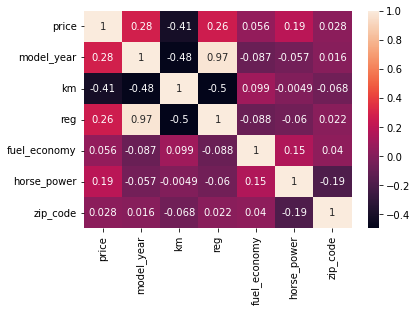

In [20]:
sns.heatmap(df.corr(), annot=True)
df.corr()

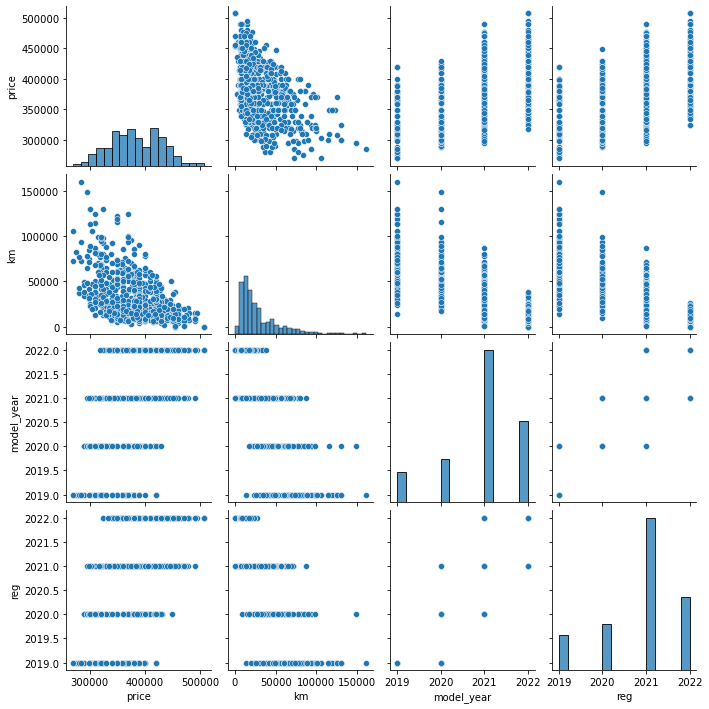

In [30]:
sns.pairplot(df[['price','km','model_year','reg']])

<AxesSubplot:xlabel='price', ylabel='model_year'>

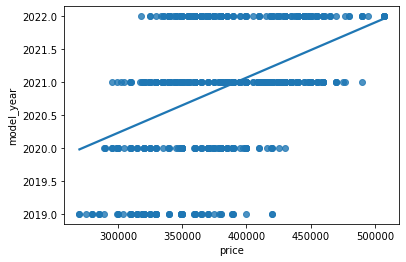

In [31]:
sns.regplot(x=df['price'], y=df['model_year'], ci=None)

/Users/vincent/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/vincent/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

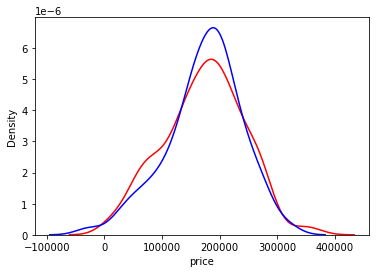

In [68]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)